In [21]:
import pandas as pd
import numpy as np

In [22]:
df_l1= pd.read_csv('/kaggle/input/english/train_en_l1.csv')
df_l1

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,text,key,en_a1,en_a2,en_a3,en_a4,en_a5,en_a6
0,"This is our history . For Shia and Sunni ,...",question_1,NaN,NaN,NaN,NaN,NaN,0.0
1,"If this is ""grilling"" then wht wud u call t...",question_1,NaN,NaN,NaN,1.0,NaN,NaN
2,look at <handle replaced>madam. Locals attac...,question_1,NaN,NaN,NaN,NaN,0.0,NaN
3,our beloved yogi ji has given money home and...,question_1,NaN,NaN,NaN,NaN,1.0,NaN
4,"""I gonna kill that bitch"" Bitvj imma kill you...",question_1,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...
6526,“mama let’s research” bitch suck my dick 😭,question_1,NaN,NaN,NaN,NaN,0.0,NaN
6527,😂😂😂😂 I WAS BY MYSELF AND IT WAS HER AND HER BI...,question_1,NaN,NaN,NaN,NaN,0.0,NaN
6528,😂😂😂😂😂😂😂😂😂 i just seen a comment and bitch IM C...,question_1,NaN,NaN,NaN,NaN,0.0,NaN
6529,"😎""Boys Only Luxury!!!!!!!!!!!!!!!!!!!!!!!!!!!""...",question_1,0.0,1.0,1.0,0.0,NaN,NaN


In [23]:
annotation_cols = ['en_a1', 'en_a2', 'en_a3', 'en_a4', 'en_a5', 'en_a6']

def get_majority_label(row):
    valid_votes = []
    for val in row:
        try:
            # Try converting to float
            fval = float(val)
            if fval in [0.0, 1.0]:
                valid_votes.append(fval)
        except (ValueError, TypeError):
            # Ignore non-numeric or missing values
            continue

    if not valid_votes:
        return None

    ones = valid_votes.count(1.0)
    zeros = valid_votes.count(0.0)

    return 1 if ones >= zeros else 0  # Favors 1 in a tie

In [24]:
# Apply to DataFrame
df_l1['label_1'] = df_l1[annotation_cols].apply(get_majority_label,axis=1)
df_l1

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,text,key,en_a1,en_a2,en_a3,en_a4,en_a5,en_a6,label_1
0,"This is our history . For Shia and Sunni ,...",question_1,NaN,NaN,NaN,NaN,NaN,0.0,0
1,"If this is ""grilling"" then wht wud u call t...",question_1,NaN,NaN,NaN,1.0,NaN,NaN,1
2,look at <handle replaced>madam. Locals attac...,question_1,NaN,NaN,NaN,NaN,0.0,NaN,0
3,our beloved yogi ji has given money home and...,question_1,NaN,NaN,NaN,NaN,1.0,NaN,1
4,"""I gonna kill that bitch"" Bitvj imma kill you...",question_1,NaN,NaN,NaN,NaN,NaN,1.0,1
...,...,...,...,...,...,...,...,...,...
6526,“mama let’s research” bitch suck my dick 😭,question_1,NaN,NaN,NaN,NaN,0.0,NaN,0
6527,😂😂😂😂 I WAS BY MYSELF AND IT WAS HER AND HER BI...,question_1,NaN,NaN,NaN,NaN,0.0,NaN,0
6528,😂😂😂😂😂😂😂😂😂 i just seen a comment and bitch IM C...,question_1,NaN,NaN,NaN,NaN,0.0,NaN,0
6529,"😎""Boys Only Luxury!!!!!!!!!!!!!!!!!!!!!!!!!!!""...",question_1,0.0,1.0,1.0,0.0,NaN,NaN,1


In [25]:
# Combine directly assuming same text order
df = pd.DataFrame({
    'text': df_l1['text'],
    'label_1': df_l1['label_1'],

})

# Convert to int
df['label_1'] = df['label_1'].astype(int)


# Preview
print(df.head())
print(df.shape)

                                                text  label_1
0      This is our history . For Shia and Sunni ,...        0
1     If this is "grilling" then wht wud u call t...        1
2    look at <handle replaced>madam. Locals attac...        0
3    our beloved yogi ji has given money home and...        1
4  "I gonna kill that bitch"  Bitvj imma kill you...        1
(6531, 2)


In [26]:
df

,text,label_1
0,"This is our history . For Shia and Sunni ,...",0
1,"If this is ""grilling"" then wht wud u call t...",1
2,look at <handle replaced>madam. Locals attac...,0
3,our beloved yogi ji has given money home and...,1
4,"""I gonna kill that bitch"" Bitvj imma kill you...",1
...,...,...
6526,“mama let’s research” bitch suck my dick 😭,0
6527,😂😂😂😂 I WAS BY MYSELF AND IT WAS HER AND HER BI...,0
6528,😂😂😂😂😂😂😂😂😂 i just seen a comment and bitch IM C...,0
6529,"😎""Boys Only Luxury!!!!!!!!!!!!!!!!!!!!!!!!!!!""...",1


In [27]:
import re
def normalize_text(text):
    text = str(text).lower()
    text = re.sub(r'<handle replaced>', '[USER]', text)       # Replace user handles
    text = re.sub(r'https?://\S+|www\.\S+', '', text)          # Remove URLs
    text = re.sub(r'<.*?>', '', text)                          # Remove any other HTML tags
    text = re.sub(r'\s+', ' ', text).strip()                   # Normalize whitespace
    return text

In [28]:
df['text'] = df['text'].apply(normalize_text)
df

,text,label_1
0,"this is our history . for shia and sunni , don...",0
1,"if this is ""grilling"" then wht wud u call th s...",1
2,look at [USER]madam. locals attacked. no relig...,0
3,our beloved yogi ji has given money home and f...,1
4,"""i gonna kill that bitch"" bitvj imma kill you ...",1
...,...,...
6526,“mama let’s research” bitch suck my dick 😭,0
6527,😂😂😂😂 i was by myself and it was her and her bi...,0
6528,😂😂😂😂😂😂😂😂😂 i just seen a comment and bitch im c...,0
6529,"😎""boys only luxury!!!!!!!!!!!!!!!!!!!!!!!!!!!""...",1


In [29]:

    # Load data into pandas DataFrame

    df_test = pd.read_csv("/kaggle/input/english/test_en_l1.csv")



    df_test['label_1'] = df_l1[annotation_cols].apply(get_majority_label,axis=1)

    df2 = pd.DataFrame({
    'text': df_test['text'],
    'label_1': df_test['label_1'],

    })

    # Convert to int
    df2['label_1'] = df2['label_1'].astype(int)


    # Preview
    print(df2.head())
    print(df2.shape)

    df2['text'] = df2['text'].apply(normalize_text)
    df2




                                                text  label_1
0  "who's this tweet about" bitch it's about you ...        0
1  #AlkaLamba should’ve used her slippers to slap...        1
2  #CoronaVillains  #COVIDIDIOT   #COVID2019 is a...        0
3  (Acts 29:19994) LIKE the female "governors" of...        1
4  ***Let us celebrate “secular” as a beautiful w...        1
(1107, 2)


,text,label_1
0,"""who's this tweet about"" bitch it's about you ...",0
1,#alkalamba should’ve used her slippers to slap...,1
2,#coronavillains #covididiot #covid2019 is a #p...,0
3,"(acts 29:19994) like the female ""governors"" of...",1
4,***let us celebrate “secular” as a beautiful w...,1
...,...,...
1102,you should be tired of not having any kind of ...,0
1103,“the limits of tyrants are prescribed by the e...,0
1104,♋️🦀 like wtf my symbol is 69 and i’m a crab an...,0
1105,"🇺🇸: marry a millionaire guy, divorce get half ...",0


Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at ai4bharat/indic-bert and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Raw Avg Loss: 0.50635390
Epoch [1/5] | Train Loss: 0.5013 | Val Loss: 0.5064 | Weighted F1: 0.7154 | Macro F1: 0.4454
Raw Avg Loss: 0.57816100
Epoch [2/5] | Train Loss: 0.4205 | Val Loss: 0.5782 | Weighted F1: 0.7138 | Macro F1: 0.4596
Raw Avg Loss: 0.58277744
Epoch [3/5] | Train Loss: 0.3799 | Val Loss: 0.5828 | Weighted F1: 0.6901 | Macro F1: 0.4790
Raw Avg Loss: 0.68196129
Epoch [4/5] | Train Loss: 0.3338 | Val Loss: 0.6820 | Weighted F1: 0.6812 | Macro F1: 0.5096
Raw Avg Loss: 0.78507196
Epoch [5/5] | Train Loss: 0.2765 | Val Loss: 0.7851 | Weighted F1: 0.6821 | Macro F1: 0.4813
Raw Avg Loss: 0.78507196
Final Test Loss: 0.7851
Final Test Weighted F1 Score: 0.6821
Final Test Macro F1 Score: 0.4813


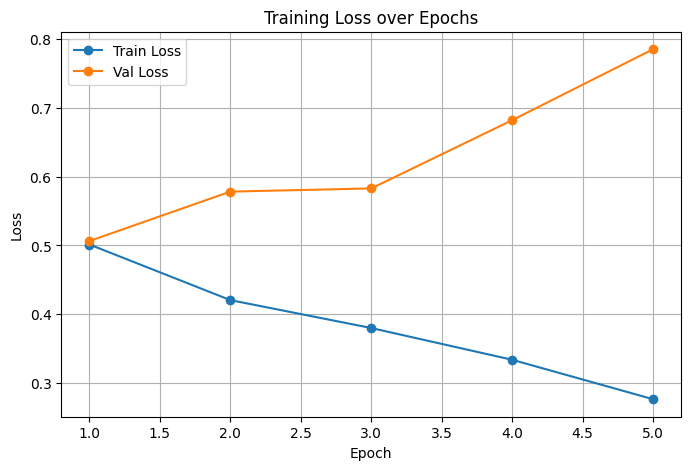

In [30]:
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AdamW
import numpy as np
from sklearn.metrics import f1_score
from torch.optim import Adam
import matplotlib.pyplot as plt 
import torch.nn as nn

########################################################################
# 1. Custom PyTorch Dataset
########################################################################
class GenderAbuseDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = self.labels[idx]

        # Tokenize the text
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            truncation=True,
            padding='max_length',
            return_tensors='pt'
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

########################################################################
# 2. Training Function
########################################################################
def train_one_epoch(model, data_loader,optimizer, device,criterion):
    model.train()
    total_loss = 0

    for batch in data_loader:
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    return total_loss / len(data_loader)

########################################################################
# 3. Evaluation Function
########################################################################
def evaluate(model, data_loader, device,criterion):
    model.eval()
    preds = []
    true_labels = []
    total_loss = 0


    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            logits = outputs.logits
            total_loss += outputs.loss.item()  

            # Predicted class is the one with the highest score
            predicted_class = torch.argmax(logits, dim=-1)
            preds.extend(predicted_class.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())

    # Compute weighted F1 score
    avg_loss = total_loss / len(data_loader)
    print(f"Raw Avg Loss: {avg_loss:.8f}")

    f1 = f1_score(true_labels, preds, average='weighted')
    macro_f1 = f1_score(true_labels, preds, average='macro')

    return avg_loss,f1,macro_f1

########################################################################
# 4. Main Script
########################################################################
def main():




    # -------------------------------
    # B) Initialize Tokenizer
    # -------------------------------
    model_name = "ai4bharat/indic-bert"
    tokenizer = AutoTokenizer.from_pretrained(model_name)

    # -------------------------------
    # C) Create PyTorch Datasets
    # -------------------------------
    train_dataset = GenderAbuseDataset(
        texts=df['text'].values,
        labels=df['label_1'].values,
        tokenizer=tokenizer,
        max_len=128
    )

    test_dataset = GenderAbuseDataset(
        texts=df2['text'].values,
        labels=df2['label_1'].values,
        tokenizer=tokenizer,
        max_len=128
    )

    # -------------------------------
    # D) Create DataLoaders
    # -------------------------------
    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

    # -------------------------------
    # E) Initialize Model
    # -------------------------------
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)
    model.to(device)

    # -------------------------------
    # F) Optimizer

    # -------------------------------
    optimizer = AdamW(model.parameters(), lr=0.00001)
    criterion = nn.CrossEntropyLoss()


    # -------------------------------
    # G) Training Loop
    # -------------------------------
    epochs = 5  # Adjust based on data size
    train_losses = []
    val_losses = []
    macro_f1_scores = []

    for epoch in range(epochs):
        train_loss = train_one_epoch(model, train_loader,optimizer, device,criterion)
        train_losses.append(train_loss)
        val_loss, weighted_f1, macro_f1 = evaluate(model, test_loader, device,criterion)
        val_losses.append(val_loss)
        macro_f1_scores.append(macro_f1)
        print(f"Epoch [{epoch+1}/{epochs}] | Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f} | Weighted F1: {weighted_f1:.4f} | Macro F1: {macro_f1:.4f}")

    # -------------------------------
    # H) Final Evaluation
    # -------------------------------
    final_val_loss, final_weighted_f1, final_macro_f1 = evaluate(model, test_loader, device,criterion)
    print(f"Final Test Loss: {final_val_loss:.4f}")
    print(f"Final Test Weighted F1 Score: {final_weighted_f1:.4f}")
    print(f"Final Test Macro F1 Score: {final_macro_f1:.4f}")

    plt.figure(figsize=(8, 5))
    plt.plot(range(1, epochs+1), train_losses, marker='o', label="Train Loss")
    plt.plot(range(1, epochs+1), val_losses, marker='o', label="Val Loss")

    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training Loss over Epochs")
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main()
